In [1]:
# ex5: chemical field of an autphoretic colloid - unbounded domain (first row) and near a wall (second row)

%matplotlib inline
import pystokes, numpy as np, matplotlib.pyplot as plt

In [2]:
# particle radius, fluid viscosity, and number of particles 
b, D, N = 1.0, 1.0/6.0, 1

#initialise  
r, p = np.array([0.0, 0.0, 5]), np.array([0.0, 0.0, 1]) 
# irreducible coeffcients  
J0 = 10*np.ones(N);  
J1 = pystokes.utils.irreducibleTensors(1, p) 
J2 = pystokes.utils.irreducibleTensors(2, p)

# space dimension , extent , discretization 
dim, L, Ng = 3, 10, 64; 

# instantiate the phoretic field class class 
ufield = pystokes.phoretic.unbounded.Field(radius=b, particles=N, phoreticConstant=D, gridpoints=Ng*Ng) 
wfield = pystokes.phoretic.wallBounded.Field(radius=b, particles=N, phoreticConstant=D, gridpoints=Ng*Ng)

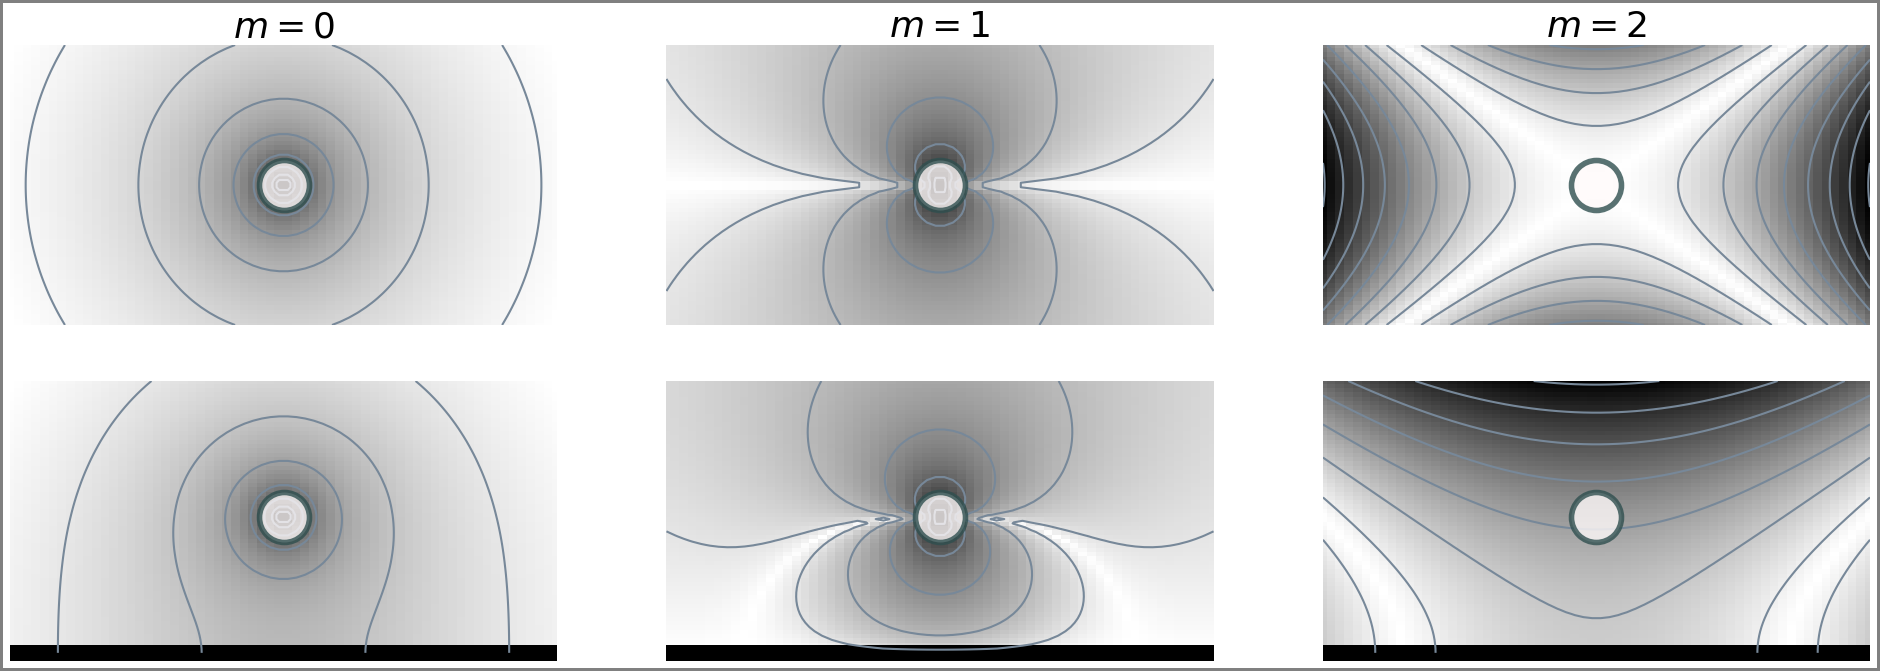

In [3]:
# plot using subplots on a given grid
rr, vv = pystokes.utils.gridYZ(dim, L, Ng)
plt.figure(figsize=(24, 8), edgecolor='gray', linewidth=4)

plt.subplot(231);  vv=vv*0;  ufield.phoreticField0(vv, rr, r, J0)   
pystokes.utils.plotContoursYZ(vv, rr, r, offset=1e-1,  title='m=0') 

plt.subplot(232);  vv=vv*0;  ufield.phoreticField1(vv, rr, r, J1)   
pystokes.utils.plotContoursYZ(vv, rr, r, offset=1e-3,  title='m=1') 

plt.subplot(233);  vv=vv*0;  ufield.phoreticField2(vv, rr, r, J2)
pystokes.utils.plotContoursYZ(vv, rr, r, offset=4e2,  title='m=2') 

plt.subplot(234);  vv=vv*0;  wfield.phoreticField0(vv, rr, r, J0)   
pystokes.utils.plotContoursYZsurf(vv, rr, r, offset=1e-2,) 

plt.subplot(235);  vv=vv*0;  wfield.phoreticField1(vv, rr, r, J1)   
pystokes.utils.plotContoursYZsurf(vv, rr, r, offset=1e-3) 

plt.subplot(236);  vv=vv*0;  wfield.phoreticField2(vv, rr, r, J2)
pystokes.utils.plotContoursYZsurf(vv, rr, r, offset=3e3) 